In [2]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn  as sns
sns.set()

In [15]:
raw_data = pd.read_csv(r'C:/Users/ASUS/Desktop/Subjects/DataSets/BinaryAnalysis.csv')
raw_data

,Annual Salary,Loans from other institutions,Defaulted
0,60.60704,1,0
1,82.21248,1,0
2,84.57768,1,0
3,85.22972,1,0
4,90.77372,0,0
...,...,...,...
2757,825.57964,1,0
2758,825.79356,1,0
2759,827.40380,1,0
2760,832.56396,1,0


In [16]:
df =raw_data.copy()


In [4]:
df['Admitted'] = df['Admitted'].map({'No': 0, 'Yes': 1})
df

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


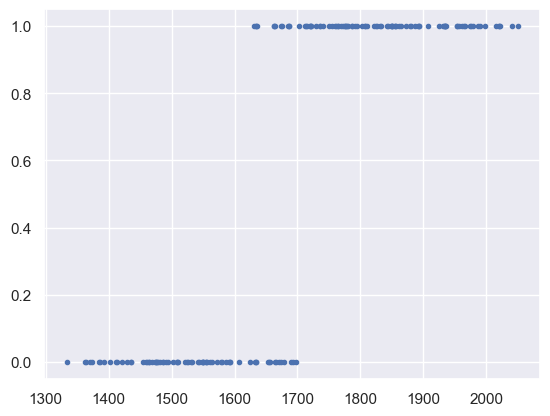

In [5]:
plt.plot(df['SAT'], df['Admitted'], '.')

In [19]:
y = df['Defaulted']
x1 = df[[ 'Annual Salary','Loans from other institutions']]
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x).fit()



Optimization terminated successfully.
         Current function value: 0.151636
         Iterations 8


In [20]:
reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Defaulted   No. Observations:                 2762
Model:                          Logit   Df Residuals:                     2759
Method:                           MLE   Df Model:                            2
Date:                Sun, 06 Aug 2023   Pseudo R-squ.:                0.003121
Time:                        14:52:28   Log-Likelihood:                -418.82
converged:                       True   LL-Null:                       -420.13
Covariance Type:            nonrobust   LLR p-value:                    0.2695
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -4.2597      0.763     -5.586      0.000      -5.754      -2.765
Annual Salary                  -2.36e-05      0.001     -0.037      0.971      -0.001       0.001
Loans from other institutions     0.9902      0.720      1.376      0.169      -0.421       2.401
=================================================================================================
"""

In [12]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [13]:
confusion_matrix(x, y,reg_log)

(array([[17.,  0.],
        [ 3.,  0.]]),
 0.85)